In [223]:
import numpy as np
import pandas as pd
import sns as sns


1. Read the Auto data (5 points)
    a. use pandas to read the data
    b. output the first few rows
    c. output the dimensions of the data

In [224]:
data = pd.read_csv("Auto.csv")
print(data)

      mpg  cylinders  displacement  horsepower  weight  acceleration  year   
0    18.0          8         307.0         130    3504          12.0  70.0  \
1    15.0          8         350.0         165    3693          11.5  70.0   
2    18.0          8         318.0         150    3436          11.0  70.0   
3    16.0          8         304.0         150    3433          12.0  70.0   
4    17.0          8         302.0         140    3449           NaN  70.0   
..    ...        ...           ...         ...     ...           ...   ...   
387  27.0          4         140.0          86    2790          15.6  82.0   
388  44.0          4          97.0          52    2130          24.6  82.0   
389  32.0          4         135.0          84    2295          11.6  82.0   
390  28.0          4         120.0          79    2625          18.6  82.0   
391  31.0          4         119.0          82    2720          19.4  82.0   

     origin                       name  
0         1  chevrolet

In [225]:
print(data.head())
print("Dimensions:", data.shape)

    mpg  cylinders  displacement  horsepower  weight  acceleration  year   
0  18.0          8         307.0         130    3504          12.0  70.0  \
1  15.0          8         350.0         165    3693          11.5  70.0   
2  18.0          8         318.0         150    3436          11.0  70.0   
3  16.0          8         304.0         150    3433          12.0  70.0   
4  17.0          8         302.0         140    3449           NaN  70.0   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  
Dimensions: (392, 9)


2. Data exploration with code (5 points)
    a. use describe() on the mpg, weight, and year columns
    b. write comments indicating the range and average of each column

In [226]:
print("MPG column:")
print(data["mpg"].describe())

print("Weight column:")
print(data["weight"].describe())

print("Year column:")
print(data["year"].describe())

MPG column:
count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64
Weight column:
count     392.000000
mean     2977.584184
std       849.402560
min      1613.000000
25%      2225.250000
50%      2803.500000
75%      3614.750000
max      5140.000000
Name: weight, dtype: float64
Year column:
count    390.000000
mean      76.010256
std        3.668093
min       70.000000
25%       73.000000
50%       76.000000
75%       79.000000
max       82.000000
Name: year, dtype: float64


MPG Column: Range = 37.6 , Mean = 23.45
Weight Column: Range = 3527 , Mean = 2977.58
Year Column: Range = 12 , Mean = 76.01

3. Explore data types (5 points)
    a. check the data types of all columns
    b. change the cylinders column to categorical (use cat.codes)
    c. change the origin column to categorical (don’t use cat.codes)
    d. verify the changes with the dtypes attribute

In [227]:
print(data.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year            float64
origin            int64
name             object
dtype: object


In [228]:
data["cylinders"] = data["cylinders"].astype("category")
data["cylinders_cat"] = data["cylinders"].cat.codes

data["origin"] = data["origin"].astype("category")

print(data.dtypes)
print(data.shape)

mpg               float64
cylinders        category
displacement      float64
horsepower          int64
weight              int64
acceleration      float64
year              float64
origin           category
name               object
cylinders_cat        int8
dtype: object
(392, 10)


4. Deal with NAs (5 points)
    a. delete rows with NAs
    b. output the new dimensions

In [229]:
print(data.shape)
data.dropna(inplace=True)
print("Dimensions after deleting rows with NAs:")
print(data.shape)

(392, 10)
Dimensions after deleting rows with NAs:
(389, 10)


5. Modify columns (10 points)
    a. make a new column, mpg_high, and make it categorical:
        i. the column == 1 if mpg > average mpg, else == 0
    b. delete the mpg and name columns (delete mpg so the algorithm doesn’t just learn
    to predict mpg_high from mpg)
    c. output the first few rows of the modified data frame

In [230]:
avg_mpg = data['mpg'].mean()
data['mpg_high'] = (data['mpg'] > avg_mpg).astype(int)

data.drop(columns=['mpg', 'name'], inplace=True)

print(data.head())

  cylinders  displacement  horsepower  weight  acceleration  year origin   
0         8         307.0         130    3504          12.0  70.0      1  \
1         8         350.0         165    3693          11.5  70.0      1   
2         8         318.0         150    3436          11.0  70.0      1   
3         8         304.0         150    3433          12.0  70.0      1   
6         8         454.0         220    4354           9.0  70.0      1   

   cylinders_cat  mpg_high  
0              4         0  
1              4         0  
2              4         0  
3              4         0  
6              4         0  


6. Data exploration with graphs (15 points)
    a. seaborn catplot on the mpg_high column
    b. seaborn relplot with horsepower on the x axis, weight on the y axis, setting hue or
    style to mpg_high
    c. seaborn boxplot with mpg_high on the x axis and weight on the y axis
    d. for each graph, write a comment indicating one thing you learned about the data
    from the graph

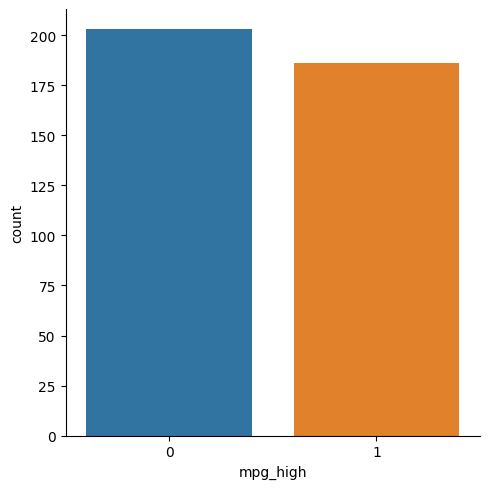

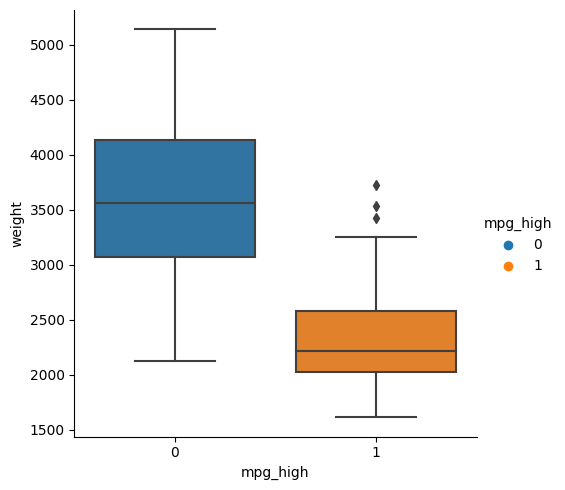

In [231]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x="mpg_high", kind="count", data=data)
sns.relplot(x="horsepower", y="weight", hue="mpg_high", data=data)
sns.boxplot(x="mpg_high", y="weight", data=data)
plt.show()

Catplot: We can see that there are more vehicles that have mpg lower than the average. However the numbers are really close.
Retplot and Boxplot: we can see that the cars with a lower weight has less mpg. This makes sense because the engine now requires less amount of work to move the vehicle.

7. Train/test split (5 points)
    a. 80/20
    b. use seed 1234 so we all get the same results
    c. train /test X data frames consists of all remaining columns except mpg_high
    d. output the dimensions of train and test

In [232]:
from sklearn.model_selection import train_test_split

np.random.seed(1234)
X = data.drop('mpg_high', axis=1)
y = data['mpg_high']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("Train:", X_train.shape, y_train.shape)
print("Test:", X_test.shape, y_test.shape)

Train: (311, 8) (311,)
Test: (78, 8) (78,)


8. Logistic Regression (10 points)
    a. train a logistic regression model using solver lbfgs
    b. test and evaluate
    c. print metrics using the classification report

In [233]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

clasf = LogisticRegression(solver='lbfgs')
clasf.fit(X_train, y_train)

y_pred = clasf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89        50
           1       0.75      0.96      0.84        28

    accuracy                           0.87        78
   macro avg       0.86      0.89      0.87        78
weighted avg       0.89      0.87      0.87        78



/Users/mdhassan/PycharmProjects/pythonProject6/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


9. Decision Tree (10 points)
    a. train a decision tree
    b. test and evaluate
    c. print the classification report metrics

In [234]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

tree = DecisionTreeClassifier(max_depth=3, random_state=1234)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88        50
           1       0.76      0.89      0.82        28

    accuracy                           0.86        78
   macro avg       0.85      0.87      0.85        78
weighted avg       0.87      0.86      0.86        78



10. Neural Network (15 points)
    a. train a neural network, choosing a network topology of your choice
    b. test and evaluate
    c. train a second network with a different topology and different settings
    d. test and evaluate
    e. compare the two models and why you think the performance was same/different

In [235]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes=(20,), max_iter=700, random_state=1234)
nn.fit(X_train, y_train)
y_pred = nn.predict(X_test)
print("Neural Network 1:")
print(classification_report(y_test, y_pred))

nn2 = MLPClassifier(hidden_layer_sizes=(20, 10), max_iter=1000, random_state=1234)
nn2.fit(X_train, y_train)
y_pred2 = nn2.predict(X_test)
print("Neural Network 2:")
print(classification_report(y_test, y_pred2))

Neural Network 1:
              precision    recall  f1-score   support

           0       0.89      0.84      0.87        50
           1       0.74      0.82      0.78        28

    accuracy                           0.83        78
   macro avg       0.82      0.83      0.82        78
weighted avg       0.84      0.83      0.83        78

Neural Network 2:
              precision    recall  f1-score   support

           0       0.93      0.78      0.85        50
           1       0.69      0.89      0.78        28

    accuracy                           0.82        78
   macro avg       0.81      0.84      0.81        78
weighted avg       0.84      0.82      0.82        78



The two neural networks have very similar results. The First one is predicting better results for class 1 while the second one is producing better results for class 0. The result are same because the topology being very similar too.

11. Analysis (15 points)
    a. which algorithm performed better?
    It looks like the logistic algorithm performed the best.
    b. compare accuracy, recall and precision metrics by class
    By comparing all three we can still see that logistic expression is giving us the best results.
    c. give your analysis of why the better-performing algorithm might have outperformed
    the other
    We can see that Logistic expression is giving us the best accuracy. This is because simple algorithm like logistic expression is suited for this problem
    d. write a couple of sentences comparing your experiences using R versus sklearn. Feel
    free to express strong preferences.
    Python is definitely easier for me because I did a similar but more complexive project like this last semester which is why I had some previous experience. However in R, it is my first time trying it so it was quite difficult for me at the beginning.